In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
age_bins = [0, 10, 30, float('inf')]
age_labels = ['New', 'Old', 'Very Old']

#was getting TypeError bc house age was saved as a string, so convert to_numeric. 
#errors='coerce'parameter will replace any non-numeric value with NaN.
df['HouseAge'] = pd.to_numeric(df['HouseAge'], errors='coerce')

df['HouseAge'] = pd.cut(df['HouseAge'], bins=age_bins, labels=age_labels)

df_house_age_hot = pd.get_dummies(df, columns=['HouseAge'])

df_house_age_hot



,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,HouseAge_New,HouseAge_Old,HouseAge_Very Old
0,8.3252,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,False,False,False
1,8.3014,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,False,False,False
2,7.2574,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,False,False,False
3,5.6431,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,False,False,False
4,3.8462,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,False,False,False
20636,2.5568,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,False,False,False
20637,1.7000,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,False,False,False
20638,1.8672,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,False,False,False


<Axes: title={'center': 'House_Age'}, xlabel='Age', ylabel='Income'>

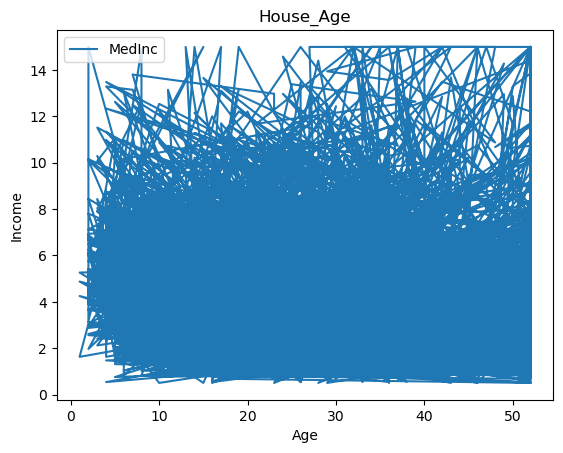

In [19]:
# Use matplotlib to plot a histogram that compares property age with its median value.

df.plot(x="HouseAge", y="MedInc", title="House_Age", xlabel="Age", ylabel="Income")

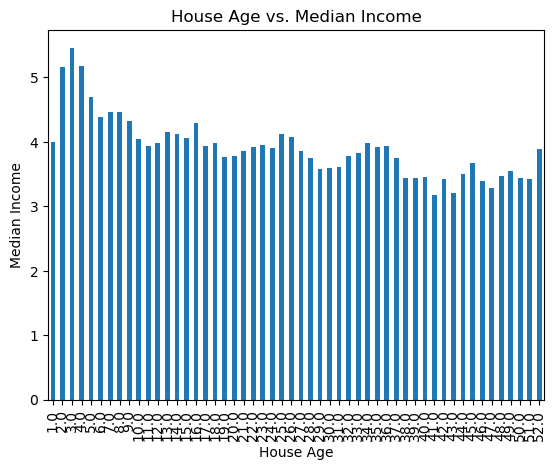

In [20]:
grouped_data = df.groupby('HouseAge')['MedInc'].mean()

# Plotting
grouped_data.plot(kind='bar', title='House Age vs. Median Income')
plt.xlabel('House Age')
plt.ylabel('Median Income')
plt.show()